<a href="https://colab.research.google.com/github/SaraivaDB/Elbow-Method/blob/main/C%C3%B3pia_de_Especifica_o_de_Requisitos_de_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install scikit-learn nltk pandas

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving normalized.csv to normalized.csv


In [9]:
normalized = pd.read_csv('/content/normalized.csv')

In [10]:
import nltk
import sklearn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  #Tokenização
  tokens = word_tokenize(text)
  #Remover pontuações
  tokens = [word for word in tokens if word.isalnum()]
  #Removendo stopwords e lematizar
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)
  normalized['RequirementText'] = normalized['RequirementText'].apply(preprocess_text)
normalized.to_csv('normalized.csv', index=False)

from sklearn.model_selection import train_test_split
# Use the correct column name 'processed_text' and variable name 'normalized'
X_train, X_test, y_train, y_test = train_test_split(normalized['_class_'], normalized['_class_'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:

normalized.head()

,RequirementText,_class_
0,system shall refresh display every second,PE
1,application shall match color schema set forth...,LF
2,project data must readable projection screen v...,US
3,product shall available normal business hour l...,A
4,project data must understandable projection sc...,US


['PE' 'LF' 'US' 'A' 'SE' 'F' 'FT' 'SC' 'PO' 'O' 'L' 'MN']


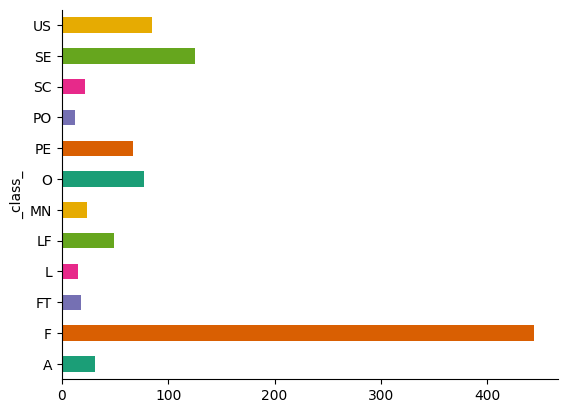

In [12]:
import pandas as pd
from matplotlib import  pyplot as plt
import seaborn as sns
print(normalized['_class_'].unique())
normalized.groupby('_class_').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

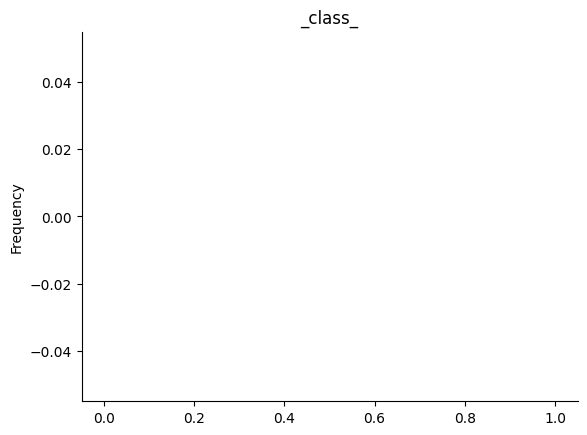

In [13]:
from matplotlib import pyplot as plt
normalized[normalized.columns[1]] = pd.to_numeric(normalized[normalized.columns[1]], errors='coerce')
normalized[normalized.columns[1]].plot(kind='hist', bins=20, title=normalized.columns[1])
plt.gca().spines[['top', 'right']].set_visible(False)

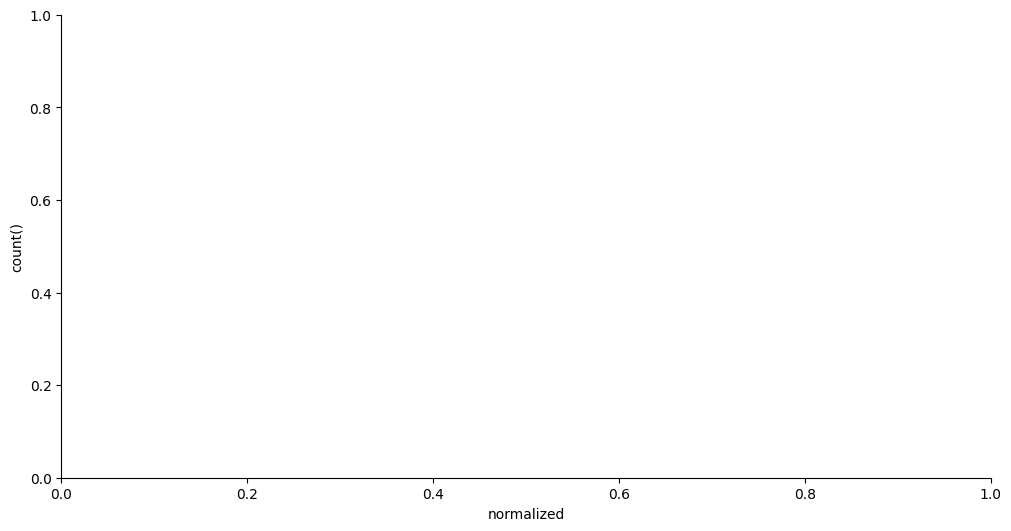

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['normalized']
                .value_counts()
              .reset_index(name='counts')
              .rename({'normalized': 'normalized'}, axis=1)
              .sort_values('normalized', ascending=True))
  xs = counted['normalized']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = normalized.sort_values('_class_', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('_class_')):
  _plot_series(series, series_name, i)
  fig.legend(title='_class_', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('normalized')
_ = plt.ylabel('count()')

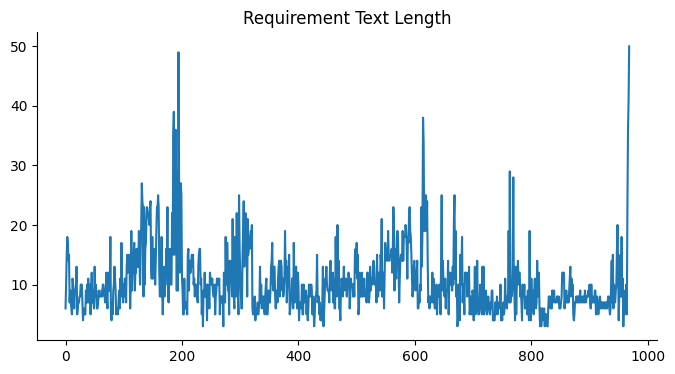

In [31]:
from matplotlib import pyplot as plt
normalized['RequirementTextLength'] = normalized['RequirementText'].apply(lambda x: len(x.split()))
normalized['RequirementTextLength'].plot(kind='line', figsize=(8, 4), title='Requirement Text Length')
plt.gca().spines[['top', 'right']].set_visible(False)

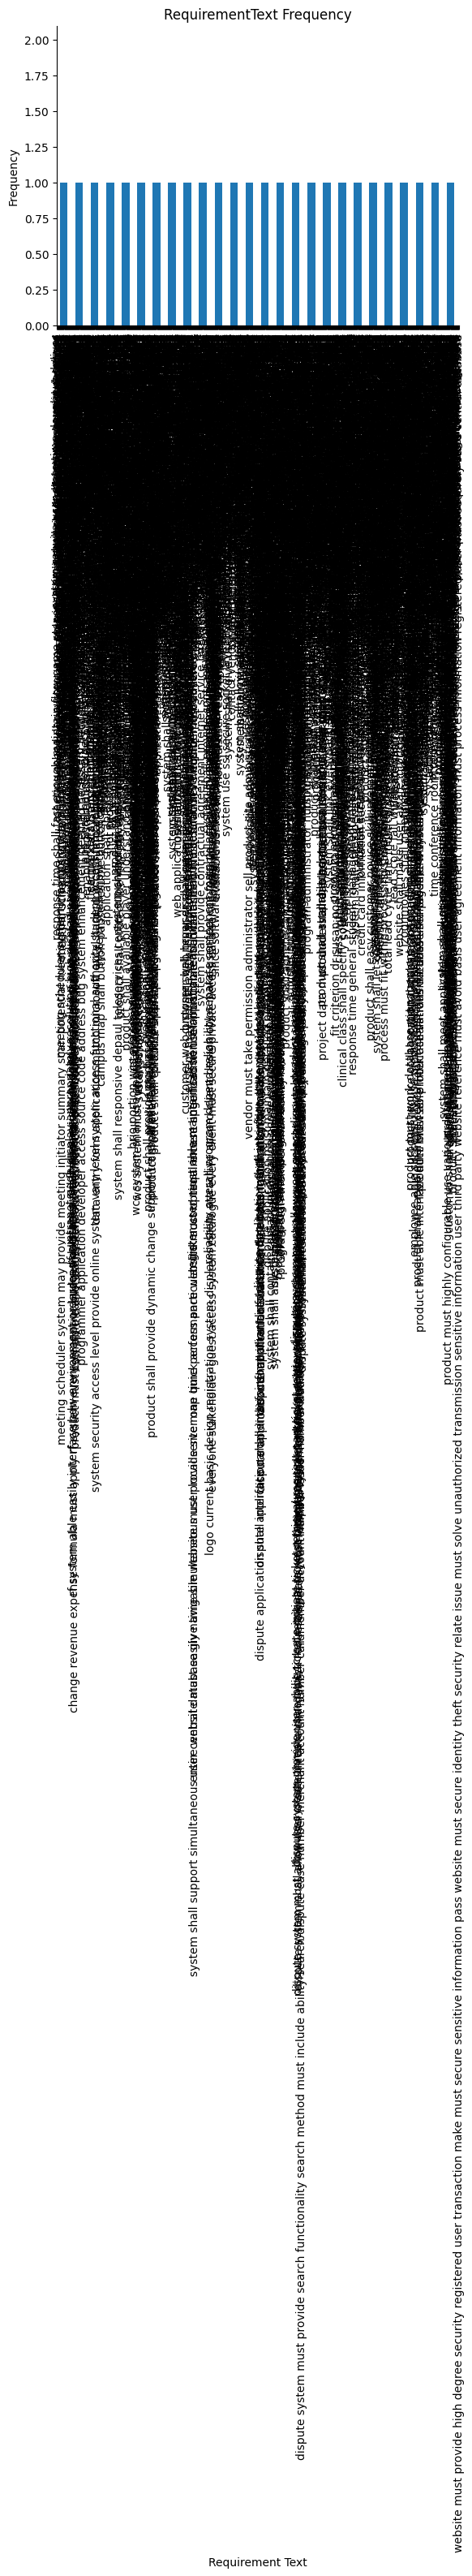

In [39]:
from matplotlib import pyplot as plt
text_counts = normalized['RequirementText'].value_counts()
# Create a bar plot to visualize the frequency distribution
text_counts.plot(kind='bar', title='RequirementText Frequency')
plt.xlabel('Requirement Text')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

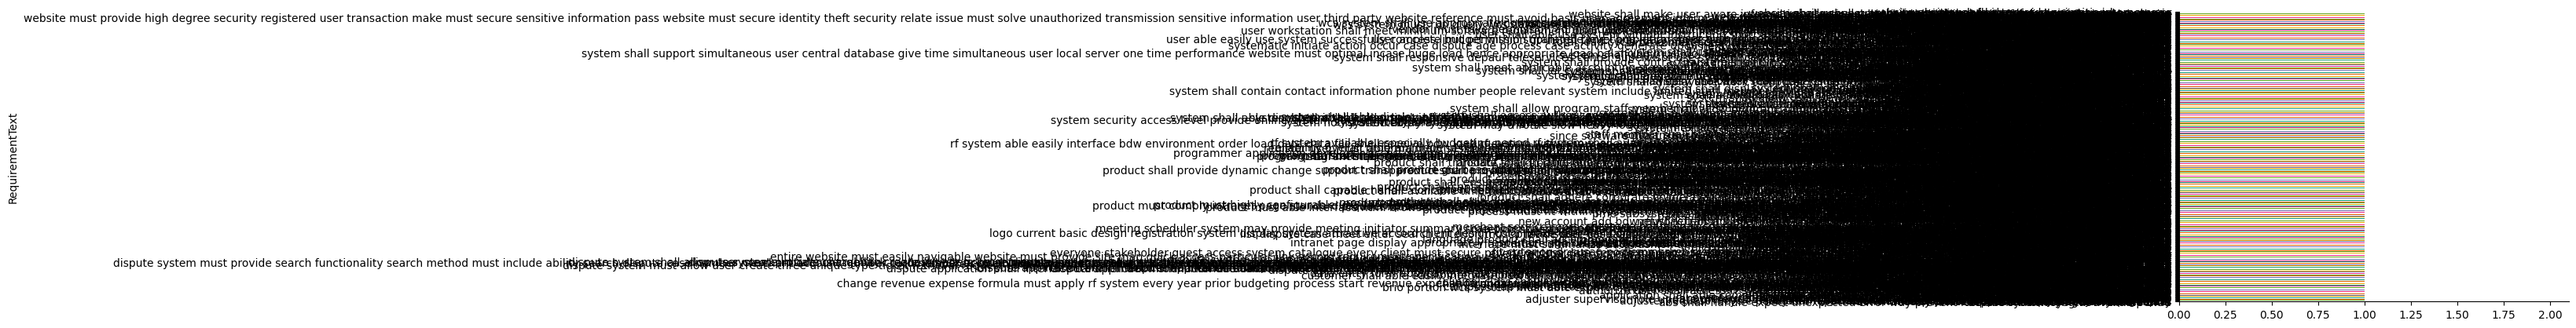

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
normalized.groupby('RequirementText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [22]:
def preprocess_text(text):
  #Tokenização
  tokens = word_tokenize(text)
  #Remover pontuações
  tokens = [word for word in tokens if word.isalnum()]
  #Removendo stopwords e lematizar
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [23]:
df = pd.read_csv('normalized.csv')

In [24]:
print(df.columns)

Index(['RequirementText', '_class_'], dtype='object')


In [45]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
def preprocess_text(text):
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word.isalnum()]
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [48]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords outside the function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word.isalnum()]
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

  df = pd.read_csv('normalized.csv')

# Apply the preprocessing function and create a new column
df['processed_text'] = df['RequirementText'].apply(preprocess_text)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['RequirementText'], test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
print(X_train.head())

722    detailed documentation code sr enable easy mai...
192    dispute system shall accurately provide list p...
947    customer web browser shall never display custo...
568    product shall platform product shall enable ac...
451    website shall allow customer add movie review ...
Name: processed_text, dtype: object


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [28]:
from sklearn.svm import SVC

model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear')

In [29]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           F       0.00      0.00      0.00        90
          FT       1.00      1.00      1.00         3
           L       0.03      1.00      0.05         3
          LF       1.00      1.00      1.00        10
          MN       1.00      1.00      1.00         7
           O       0.00      0.00      0.00        11
          PE       1.00      1.00      1.00        12
          PO       1.00      1.00      1.00         2
          SC       1.00      1.00      1.00         6
          SE       1.00      1.00      1.00        24
          US       1.00      1.00      1.00        18

    accuracy                           0.44       194
   macro avg       0.67      0.75      0.67       194
weighted avg       0.42      0.44      0.42       194



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, y_train)